## Data Collection

In [6]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import nltk
from nltk import word_tokenize
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,\
 MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, naive_bayes,\
 neighbors, ensemble, neural_network, svm
import statsmodels.api as sm
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC
import tensorflow as tf
from gaminet import GAMINet
from gaminet.utils import plot_trajectory, plot_regularization,\
 local_visualize, global_visualize_density,\
 feature_importance_visualize
import matplotlib.pyplot as plt
import re
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight
from collections import Counter
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import time
import plotly.express as px
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
import shap
import networkx as nx
import matplotlib.pyplot as plt
import torch
import requests
import json

In [7]:
import torch.nn.functional as F
from torch.nn import Linear, Dropout

In [8]:
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import InMemoryDataset, Data

In [9]:
excel_file = r'C:\Users\colte\OneDrive\Documents\Research\AnalysisofMergedNetwork.xlsx'
sheet_1 = 'Sheet1'
workbook = load_workbook(excel_file, read_only=False, data_only=False, keep_links=True)
sheet = workbook[sheet_1]
data=[]
for row in sheet.iter_rows(values_only=True): data.append(row)
workbook.close()
df = pd.read_excel(excel_file, header=0)

## DisGeNet

In [33]:
all_data = []

Failed to retrieve data for 18S_rRNA
Failed to retrieve data for 28S_rRNA
Failed to retrieve data for A2M
Failed to retrieve data for A2ML1
Failed to retrieve data for AARS1
Failed to retrieve data for AASDH
Failed to retrieve data for AASS
Failed to retrieve data for AATF
Failed to retrieve data for ABCA1
Failed to retrieve data for ABCA12
Failed to retrieve data for ABCB10
Failed to retrieve data for ABCG1
Failed to retrieve data for ABCG2
Failed to retrieve data for ABCG4
Failed to retrieve data for ABHD11
Failed to retrieve data for ABHD12
Failed to retrieve data for ABHD4
Failed to retrieve data for ABHD5
Failed to retrieve data for ABHD6
Failed to retrieve data for ACAN
Failed to retrieve data for ACD
Failed to retrieve data for ACE
Failed to retrieve data for ACER3
Failed to retrieve data for ACHE
Failed to retrieve data for ACLY
Failed to retrieve data for ACO1
Failed to retrieve data for ACOT7
Failed to retrieve data for ACSL6
Failed to retrieve data for ACSS1
Failed to retrie

In [37]:
protein_info = [{
   "Protein Name": "",
        "Consequence": "",
        "Disease Class": "",
        "VariantDisease Association Score": "",
        "biological_process": "",
        "molecular_function": "",
        "disease": ""
}
]

In [38]:
for i in df["Protein Name"]:
    protein_info.append({
        "Protein Name": i,
        "Consequence": "",
        "Disease Class": "",
        "VariantDisease Association Score": "",
        "biological_process": "",
        "molecular_function": "",
        "disease": ""
    })

In [39]:
for protein in protein_info:
    matching_entry = df_disgenet[df_disgenet['gene_symbol'] == protein['Protein Name']]
    if not matching_entry.empty:
        protein['Consequence'] = matching_entry['variant_consequence_type'].values[0]
        protein['Disease Class'] = matching_entry['disease_class'].values[0]
        protein['VariantDisease Association Score'] = matching_entry['score'].values[0]
        protein['disease'] = matching_entry['disease_name'].values[0]
    else:
        protein['Consequence'] = 'Not available'
        protein['Disease Class'] = 'Not available'
        protein['VariantDisease Association Score'] = 'Not available'
        protein['disease'] = 'Not available'

KeyError: 'gene_symbol'

In [40]:
pd.DataFrame(protein_info)

Protein Name Consequence Disease Class VariantDisease Association Score  \
0                                                                              
1        18S_rRNA                                                              
2        28S_rRNA                                                              
3             A2M                                                              
4           A2ML1                                                              
...           ...         ...           ...                              ...   
2572       ZNF763                                                              
2573         ZPR1                                                              
2574       ZSCAN1                                                              
2575       ZYG11A                                                              
2576       ZYG11B                                                              

     biological_process molecular_function disease  
0                                                   
1                                                   
2                                                   
3                                                   
4                                                   
...                 ...                ...     ...  
2572                                                
2573                                                
2574                                                
2575                                                
2576                                                

[2577 rows x 7 columns]

## Protein Atlas

In [41]:
for protein in protein_info:
    protein_name = protein['Protein Name']
    url = f"https://www.proteinatlas.org/api/search_download.php?search={protein_name}&format=json&columns=upbp,up_mf&compress=no"
    
    response = requests.get(url)
    data = response.json()

    if data:  # Check if data is not empty
        first_record = data[0]  # Get the first record

        protein['biological_process'] = first_record.get('Biological process', 'Not available')
        protein['molecular_function'] = first_record.get('Molecular function', 'Not available')
    else:
        protein['biological_process'] = 'Not available'
        protein['molecular_function'] = 'Not available'

pd.DataFrame(protein_info)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
for protein in protein_info:
    protein_name = protein['protein_name']
    url = f"https://www.proteinatlas.org/api/search_download.php?search={protein_name}&format=json&columns=upbp,up_mf&compress=no"
    
    response = requests.get(url)

    # Check if the response status code indicates success
    if response.status_code == 200:
        try:
            data = response.json()

            if data:  # Check if data is not empty
                first_record = data[0]  # Get the first record
                protein['biological_process'] = first_record.get('Biological process', 'Not available')
                protein['molecular_function'] = first_record.get('Molecular function', 'Not available')
            else:
                protein['biological_process'] = 'Not available'
                protein['molecular_function'] = 'Not available'

        except ValueError:  # Catch JSON decode error
            print(f"Error decoding JSON for protein {protein_name}")
            protein['biological_process'] = 'JSON error'
            protein['molecular_function'] = 'JSON error'
    else:
        print(f"Failed to retrieve data for {protein_name} (Status Code: {response.status_code})")
        protein['biological_process'] = 'Not available'
        protein['molecular_function'] = 'Not available'

pd.DataFrame(protein_info)

In [ ]:
protein_info_df = pd.DataFrame(protein_info)
protein_info_df = protein_info_df.iloc[1:]

## Data Merging

In [73]:
df = pd.merge(df, protein_info_df, on='Protein Name', how='left')

In [74]:
df

Protein Name       Class  Degree  Closeness  Eccentricity  \
0        18S_rRNA    Microtia       0   0.000000             0   
1        28S_rRNA    Microtia       0   0.000000             0   
2             A2M    Microtia      50   0.414710             5   
3           A2ML1    Microtia       6   0.319625             6   
4           AARS1  Microsomia       3   0.310319             6   
...           ...         ...     ...        ...           ...   
2571       ZNF763         FAS      15   0.380881             5   
2572         ZPR1         FAS      33   0.401080             5   
2573       ZSCAN1         FAS       5   0.346360             6   
2574       ZYG11A  Microsomia       3   0.277888             6   
2575       ZYG11B  Microsomia       4   0.286915             6   

      Clustering Coefficient  Stress  Neighborhood Connectivity    Betweeness  \
0                   0.000000       0                   0.000000  0.000000e+00   
1                   0.000000       0                   0.000000  0.000000e+00   
2                   0.471020   52934                 201.200000  1.401394e-04   
3                   0.400000     376                  57.833333  5.155021e-06   
4                   0.000000     578                  37.333333  3.996026e-06   
...                      ...     ...                        ...           ...   
2571                0.590476   10344                 285.466667  1.276541e-05   
2572                0.132576   71744                 115.545455  2.674140e-04   
2573                0.400000    1918                 125.800000  6.042975e-06   
2574                0.666667     278                   7.000000  7.159762e-07   
2575                0.166667    1552                  16.250000  1.375011e-05   

      Radiality  # Undirected edges  Topological Coefficeint   Nucleus  \
0           inf                   0                 0.000000  3.273139   
1           inf                   0                 0.000000  2.845988   
2      0.998279                  50                 0.133688  3.227889   
3      0.997404                   6                 0.296392  1.607035   
4      0.997290                   3                 0.349359  3.058221   
...         ...                 ...                      ...       ...   
2571   0.998018                  15                 0.272785  4.610843   
2572   0.998179                  33                 0.087644  5.000000   
2573   0.997699                   5                 0.236911  4.749664   
2574   0.996831                   3                 0.437500  1.539166   
2575   0.996969                   4                 0.271552  2.338485   

      Plasma Membrane  Mitochondrion  Extracellular         Target Family  \
0            2.648061       3.092699       2.789670                 Other   
1            1.788891       2.816826       1.992184                 Other   
2            3.047976       2.207956       4.793668                 Other   
3            2.600568       1.079030       5.000000                 Other   
4            2.322885       4.170728       4.350264                Enzyme   
...               ...            ...            ...                   ...   
2571         1.889169       1.969543       1.694706  Transcription Factor   
2572         1.751963       1.808320       1.935641                 Other   
2573         1.408054       1.273409       1.455503  Transcription Factor   
2574         0.590812       0.786034       0.187500                 Other   
2575         0.801555       1.098166       0.615473                 Other   

         Blood      Bone  Bone Marrow  Cytoskeleton   Cytosol     Heart  \
0     3.123871  2.375553     2.288367      2.600233  2.820738  2.626361   
1     2.313193  1.778352     1.506771      1.905226  2.263410  1.827715   
2     4.520268  2.011698     4.436654      2.267031  3.158467  4.143828   
3     1.656317  0.769138     0.660260      1.397140  1.479816  1.339895   
4     3.168721  1.402774     1.810513      1.70804

## Sequence Info

In [75]:
seq_records = []
for index, row in df.iterrows():
    protein_name = row['Protein Name']
    protein_sequence = row['Sequence'].replace('\n', '')
    seq = Seq(protein_sequence)
    record = SeqRecord(seq, id=protein_name, description='')
    seq_records.append(record)

In [76]:
fasta_file_path = 'protein_sequences.fasta'
with open(fasta_file_path, 'w') as output_file:
    SeqIO.write(seq_records, output_file, 'fasta')

In [77]:
sequences = []
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence_description = record.description
        sequence = str(record.seq) 
        sequences.append({'ID': sequence_id,'Description': sequence_description,'Sequence': sequence})

In [78]:
for seq_info in sequences:
    print(f"ID: {seq_info['ID']}")
    print(f"Description: {seq_info['Description']}")
    print(f"Sequence: {seq_info['Sequence']}")
    print()

ID: 18S_rRNA
Description: 18S_rRNA
Sequence: MGKGKNKMHEPKNGRPQRGANGHSSRQNHRRMEMKYDNSEKMKFPVKLAMWDFDHCDPKRCSGKKLERLGLIKSLRVGQKFQGIVVSPNGKGVVCPDDLEIVEQHGASVVECSWARLEEVPFNKIGGKHERLLPYLVAANQVNYGRPWRLNCVEALAACFAIVGRMDWASELLSHFSWGMGFLELNKELLEIYQQCTDCDSVKRAEEEWLQKLEKETQERKSRAKEEDIWMMGNINRRGNGSQSDTSESEENSEQSDLEGNNQCIEYDSLGNAIRIDNMKSREAQSEESEDEESGSKENGEPLSYDPLGNLIR

ID: 28S_rRNA
Description: 28S_rRNA
Sequence: MGLYAAAAGVLAGVESRQGSIKGLVYSSNFQNVKQLYALVCETQRYSAVLDAVIASAGLLRAEKKLRPHLAKVLVYELLLGKGFRGGGGRWKALLGRHQARLKAELARLKVHRGVSRNEDLLEVGSRPGPASQLPRFVRVNTLKTCSDDVVDYFKRQGFSYQGRASSLDDLRALKGKHFLLDPLMPELLVFPAQTDLHEHPLYRAGHLILQDRASCLPAMLLDPPPGSHVIDACAAPGNKTSHLAALLKNQGKIFAFDLDAKRLASMATLLARAGVSCCELAEEDFLAVSPSDPRYHEVHYILLDPSCSGSGMPSRQLEEPGAGTPSPVRLHALAGFQQRALCHALTFPSLQRLVYSTCSLCQEENEDVVRDALQQNPGAFRLAPALPAWPHRGLSTFPGAEHCLRASPETTLSSGFFVAVIERVEVPR

ID: A2M
Description: A2M
Sequence: MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEKGCVLLSYLNETVTVSASLESVRGNRSLFTDLEAENDVLHCVAFAVPKSSSNEEVMFLTVQVKGPTQEFKKRTTVMVKNEDSLV

In [79]:
pattern = r'G..AT'
sequences_with_pattern = []
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence = str(record.seq)
        if re.search(pattern, sequence):
            sequences_with_pattern.append(record)
for record in sequences_with_pattern:
    print(f"ID: {record.id}")
    #print(f"Description: {record.description}")
    #print(f"Sequence: {record.seq}")
    print()

ID: AARS1

ID: ABCA1

ID: ABCG2

ID: ABHD4

ID: ACAN

ID: ACE

ID: ACHE

ID: ACLY

ID: ACSS2

ID: ADAR

ID: ADCY1

ID: ADGRV1

ID: ADH7

ID: AFMID

ID: AGXT

ID: AHNAK

ID: ANK1

ID: ANK2

ID: ANK3

ID: APLNR

ID: ARHGAP23

ID: ARID1B

ID: ARL13B

ID: ASH1L

ID: ATP5MG

ID: ATP6V1A

ID: ATP8A1

ID: B4E171_HUMAN

ID: BAZ1A

ID: BCAR1

ID: BCL2

ID: BCL2L11

ID: BCR

ID: BPTF

ID: BRAF

ID: BRWD1

ID: C2CD2L

ID: CABLES1

ID: CACNA1A

ID: CACNA1F

ID: CALU

ID: CAMK4

ID: CAPN10

ID: CARMIL3

ID: CBR1

ID: CD34

ID: CELF5

ID: CELSR2

ID: CENPJ

ID: CHDH

ID: CMTM3

ID: CNTNAP4

ID: COL23A1

ID: COPB1

ID: CPNE7

ID: CRYBG1

ID: CSMD3

ID: CSPG4

ID: CTNND2

ID: CUL2

ID: CUX1

ID: CYBA

ID: DACT2

ID: DAGLB

ID: DCHS1

ID: DGCR2

ID: DHRS3

ID: DHX30

ID: DIO3

ID: DKK1

ID: DMD

ID: DNAJC6

ID: DND1

ID: DOCK7

ID: DPEP3

ID: DROSHA

ID: EBF4

ID: EFCAB8

ID: EFTUD2

ID: EGF

ID: EIF2AK2

ID: EIF4A1

ID: EIF4A2

ID: EIF4A3

ID: ELOA2

ID: EMCN

ID: ENO2

ID: EP300

ID: EPHB4

ID: ESR1


In [80]:
sequence_lengths = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence_length = len(record.seq)
        sequence_lengths[sequence_id] = sequence_length
df['SequenceLength'] = df['Protein Name'].map(sequence_lengths)

In [81]:
molecular_weights = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence_id = record.id
        sequence = str(record.seq)
        valid_sequence = ''.join([aa for aa in sequence if aa in 'ACDEFGHIKLMNPQRSTVWY'])
        mw = molecular_weight(sequence, 'protein')
        molecular_weights[sequence_id] = mw

In [82]:
df['MolecularWeight'] = df['Protein Name'].map(molecular_weights)

In [83]:
signal_peptide_pattern = r'[MF][KR].{3,}.[LI].{2,}[GAP].[STAG].{2,}R'
signal_peptide_counts = {}
with open(fasta_file_path, 'r') as fasta:
    for record in SeqIO.parse(fasta, 'fasta'):
        sequence = str(record.seq)
        signal_peptide_matches = re.findall(signal_peptide_pattern, sequence)
        signal_peptide_counts[record.id] = len(signal_peptide_matches)

In [84]:
signal_peptide_count_df = pd.DataFrame({'SequenceID': signal_peptide_counts.keys(),'SignalPeptideCount': signal_peptide_counts.values()})

In [85]:
dfnew = df.merge(signal_peptide_count_df, left_on='Protein Name', right_on='SequenceID', how='left')

In [86]:
dfnew.drop("SequenceID", axis=1, inplace=True)

In [87]:
df = dfnew

In [88]:
amino_acid_data = []
for record in SeqIO.parse(fasta_file_path, 'fasta'):
    protein_name = record.id
    protein_sequence = str(record.seq)
    amino_acid_count = Counter(protein_sequence)
    amino_acid_data.append({'Protein Name': protein_name, **amino_acid_count})
amino_acid_df = pd.DataFrame(amino_acid_data)
merged_df = df.merge(amino_acid_df, on='Protein Name', how='left')
df = merged_df

In [89]:
pd.set_option('display.max_columns', None)

Text(0, 0.5, 'Class')

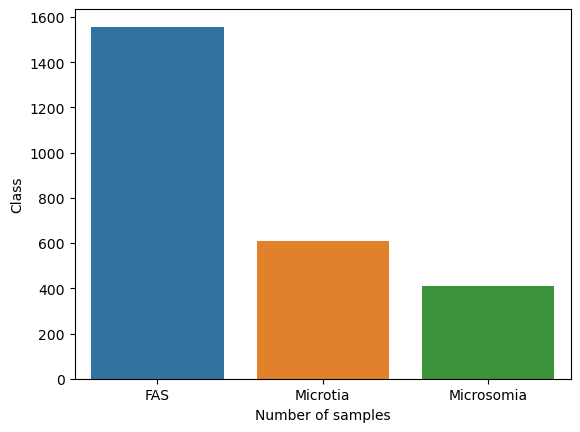

In [90]:
df_class = df['Class'].value_counts().reset_index()
df_class.columns = ['Class', 'Count']
sns.barplot(x = "Class", y = "Count", data=df_class)
plt.xlabel("Number of samples")
plt.ylabel("Class")

## Data Cleaning

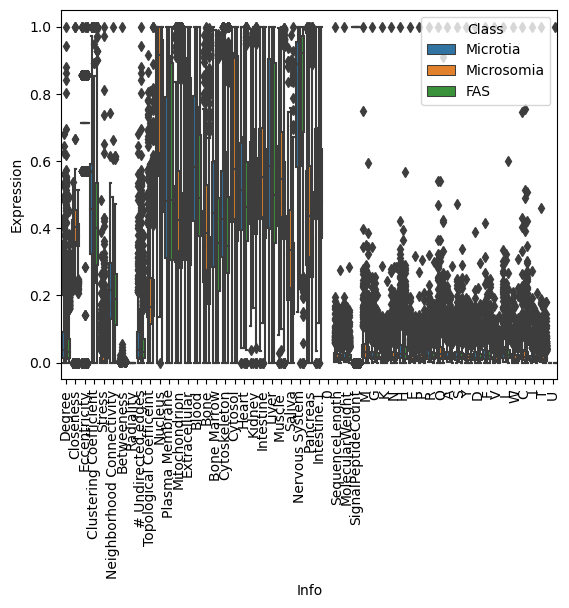

In [91]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
normalized_df = df.copy()
normalized_df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())
df_m = pd.melt(normalized_df, id_vars="Class", value_vars=numeric_columns)
ax = sns.boxplot(x="variable", y="value", data=df_m, hue="Class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Info")
plt.ylabel("Expression")
plt.show()

In [92]:
df[numeric_columns] = normalized_df[numeric_columns]

In [93]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_transformed = df.copy()
df_transformed[numeric_columns] = df_transformed[numeric_columns].apply(lambda x: np.log1p(x))
print(df_transformed[numeric_columns])

        Degree  Closeness  Eccentricity  Clustering Coefficient    Stress  \
0     0.000000   0.000000      0.000000                0.000000  0.000000   
1     0.000000   0.000000      0.000000                0.000000  0.000000   
2     0.059189   0.346925      0.538997                0.385956  0.004153   
3     0.007290   0.277348      0.619039                0.336472  0.000030   
4     0.003652   0.270271      0.619039                0.000000  0.000045   
...        ...        ...           ...                     ...       ...   
2571  0.018127   0.322721      0.538997                0.464033  0.000813   
2572  0.039455   0.337243      0.538997                0.124494  0.005625   
2573  0.006079   0.297404      0.619039                0.336472  0.000151   
2574  0.003652   0.245209      0.619039                0.510826  0.000022   
2575  0.004866   0.252248      0.619039                0.154151  0.000122   

      Neighborhood Connectivity    Betweeness  Radiality  # Undirected edge

## Data Splitting

In [94]:
column_names = df.columns
column_names_list = column_names.tolist()
print(column_names_list)

['Protein Name', 'Class', 'Degree', 'Closeness', 'Eccentricity', 'Clustering Coefficient', 'Stress', 'Neighborhood Connectivity', 'Betweeness', 'Radiality', '# Undirected edges', 'Topological Coefficeint', 'Nucleus', 'Plasma Membrane', 'Mitochondrion', 'Extracellular', 'Target Family', 'Blood', 'Bone', 'Bone Marrow', 'Cytoskeleton', 'Cytosol', 'Heart', 'Kidney', 'Intestine', 'Liver', 'Muscle ', 'Saliva', 'Nervous System', 'Pancreas', 'Intestine.1', 'Sequence', 'Family', 0, 'Consequence', 'Disease Class', 'VariantDisease Association Score', 'biological_process', 'molecular_function', 'disease', 'SequenceLength', 'MolecularWeight', 'SignalPeptideCount', 'M', 'G', 'K', 'N', 'H', 'E', 'P', 'R', 'Q', 'A', 'S', 'Y', 'D', 'F', 'V', 'L', 'W', 'C', 'I', 'T', 'U']


In [112]:
def list_to_string(lst):
    if isinstance(lst, list):
        return ', '.join(map(str, lst))
    return str(lst)
for column in df.columns:
    df[column] = df[column].apply(list_to_string)
columns_to_drop = ['Protein Name', 'Class','Sequence','Family','Intestine.1','disease','Disease Class','VariantDisease Association Score'] 
#Remove VDA Score when API is corrected
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Class']

In [113]:
N = 20
top_n = X['molecular_function'].value_counts().index[:N]
X['molecular_function'] = X['molecular_function'].where(X['molecular_function'].isin(top_n), 'Other')
top_n = X['biological_process'].value_counts().index[:N]
X['biological_process'] = X['biological_process'].where(X['biological_process'].isin(top_n), 'Other')
X_encoded = pd.get_dummies(X, columns=['molecular_function', 'biological_process'])

In [114]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_encoded = pd.get_dummies(X_encoded, columns=['Target Family'])
X_encoded = pd.get_dummies(X_encoded, columns=['Consequence'])

In [117]:
X_encoded.replace('nan', 0, inplace=True)
X_encoded.replace('inf', 0, inplace=True)
#X_encoded['VariantDisease Association Score'] = X_encoded['VariantDisease Association Score'].replace('Not available', 0)

In [118]:
X_encoded

Degree          Closeness        Eccentricity  \
0                      0.0                0.0                 0.0   
1                      0.0                0.0                 0.0   
2      0.06097560975609756  0.414710228205549  0.7142857142857143   
3     0.007317073170731708  0.319625458686574  0.8571428571428571   
4     0.003658536585365854   0.31031941031941  0.8571428571428571   
...                    ...                ...                 ...   
2571  0.018292682926829267  0.380880579010856  0.7142857142857143   
2572   0.04024390243902439  0.401079707843759  0.7142857142857143   
2573  0.006097560975609756  0.346359522830111  0.8571428571428571   
2574  0.003658536585365854  0.277887788778877  0.8571428571428571   
2575  0.004878048780487805  0.286915038618809  0.8571428571428571   

     Clustering Coefficient                  Stress Neighborhood Connectivity  \
0                       0.0                     0.0                       0.0   
1                       0.0                     0.0                       0.0   
2         0.471020408163265    0.004161663168345384       0.27905686546463243   
3                       0.4  2.9561063802052827e-05       0.08021266759130832   
4                       0.0   4.544227361060249e-05       0.05177993527508086   
...                     ...                     ...                       ...   
2571       0.59047619047619   0.0008132437339586023        0.3959315765140999   
2572      0.132575757575757    0.005640502556953399       0.16025721850964494   
2573                    0.4  0.00015079287333068437       0.17447988904299583   
2574      0.666666666666666  2.1856318449390124e-05      0.009708737864077669   
2575      0.166666666666666  0.00012201800803400529      0.022538141470180306   

                Betweeness Radiality    # Undirected edges  \
0                      0.0         0                   0.0   
1                      0.0         0                   0.0   
2     0.000140139436304817       0.0   0.06097560975609756   
3     5.15502143296681e-06       0.0  0.007317073170731708   
4     3.99602626757042e-06       0.0  0.003658536585365854   
...                    ...       ...                   ...   
2571  1.27654085749117e-05       0.0  0.018292682926829267   
2572  0.000267413967641175       0.0   0.04024390243902439   
2573  6.04297471167632e-06       0.0  0.006097560975609756   
2574  7.15976198348623e-07       0.0  0.003658536585365854   
2575  1.37501144768553e-05       0.0  0.004878048780487805   

     Topological Coefficeint              Nucleus      Plasma Membrane  \
0                        0.0            0.6546278   0.5296122000000001   
1                        0.0   0.5691976000000001            0.3577782   
2          0.178250276854928            0.6455778            0.6095952   
3         0.3951890034364253             0.321407            0.5201136   
4         0.4658119658119653            0.6116442  0.46457699999999996   
...                      ...                  ...                  ...   
2571     0.36371361801572005            0.9221686            0.3778338   
2572     0.11685903036434132                  1.0            0.3503926   
2573      0.3158819836785933            0.9499328            0.2816108   
2574      0.5833333333333334  0.30783320000000003            0.1181624   
2575      0.3620689655172413             0.467697             0.160311   

            Mitochondrion        Extracellular                Blood  \
0               0.6185398             0.557934            0.6247742   
1               0.5633652            0.3984368            0.4626386   
2     0.44159119999999996   0.9587336000000001   0.9040535999999999   
3                0.215806                  1.0            0.3312634   
4               0.8341456   0.8700528000000001            0.6337442   
...                   ...                  ...                  ...   
2571            0.3939086            0.3389412  0.44252339999999996   
2572            

## Model Training & Random Forest Classifier

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2060, 106), (516, 106), (2060,), (516,))

In [126]:
X_train = X_train.replace({'True': True, 'False': False})
X_test = X_test.replace({'True': True, 'False': False})
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
label_encoder = LabelEncoder()
yXG_train = label_encoder.fit_transform(y_train)
yXG_test = label_encoder.fit_transform(y_test)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
model_proteins = RandomForestClassifier(n_estimators=100, random_state=42)
model_proteins.fit(X_train, yXG_train)

RandomForestClassifier(random_state=42)

In [127]:
y_pred = model_proteins.predict(X_test)

In [128]:
accuracy = accuracy_score(yXG_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.6608527131782945


In [129]:
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_proteins, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.57281553 0.68932039 0.64563107 0.63106796 0.67475728 0.66504854
 0.60194175 0.66019417 0.69417476 0.68932039]


In [130]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.6524271844660194}
{0.038173986895800996}


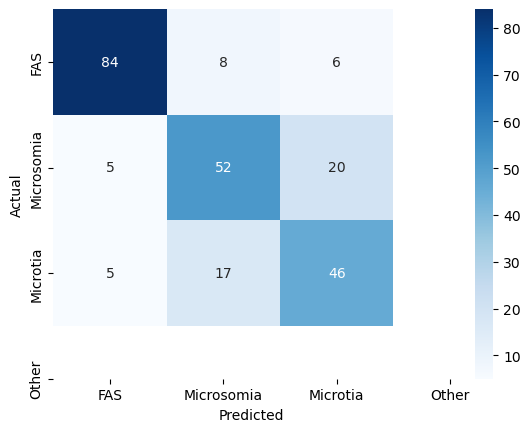

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model_proteins.predict(X_test)
cm = confusion_matrix(yXG_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['FAS','Microsomia','Microtia','Other'], 
            yticklabels=['FAS','Microsomia','Microtia','Other'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
start_time = time.time()
importances = model_proteins.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_proteins.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


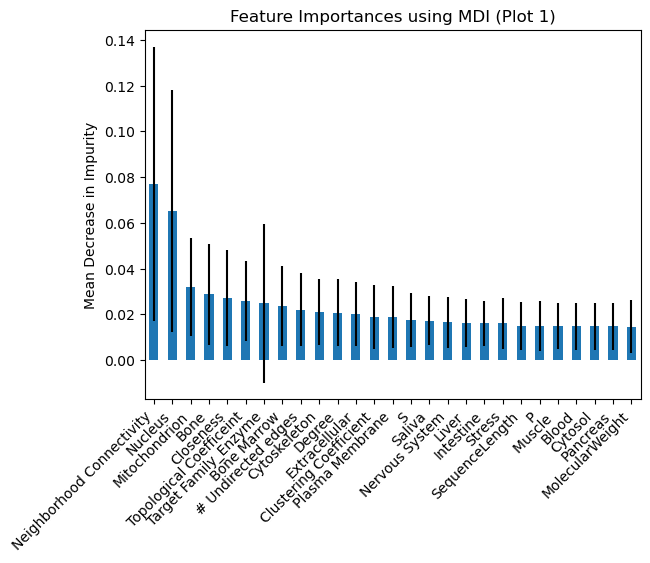

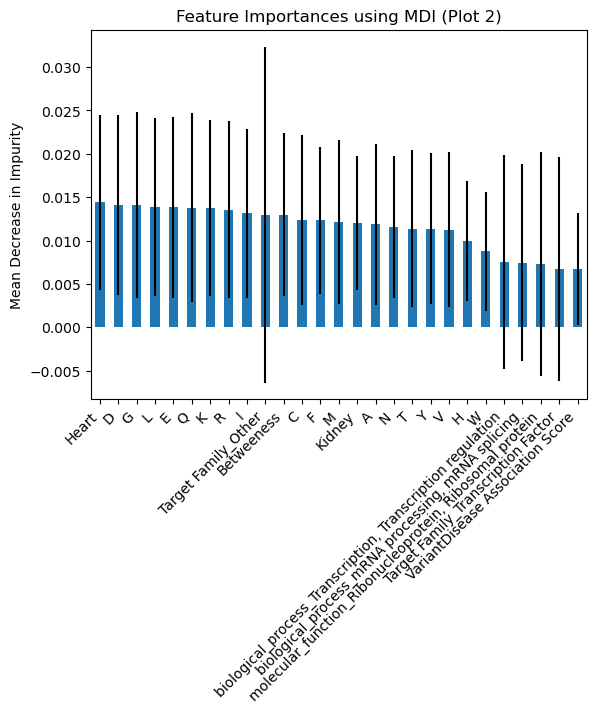

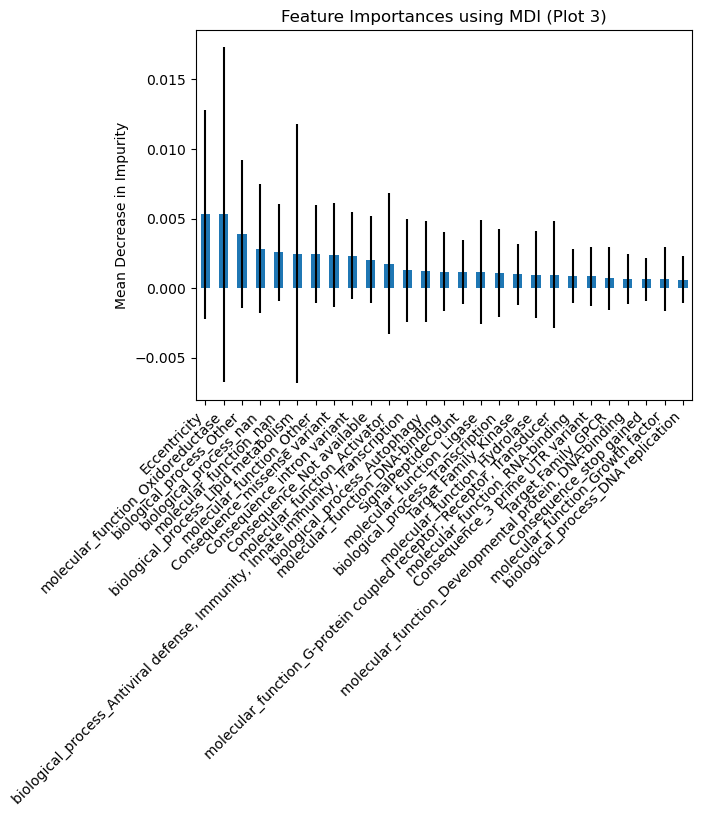

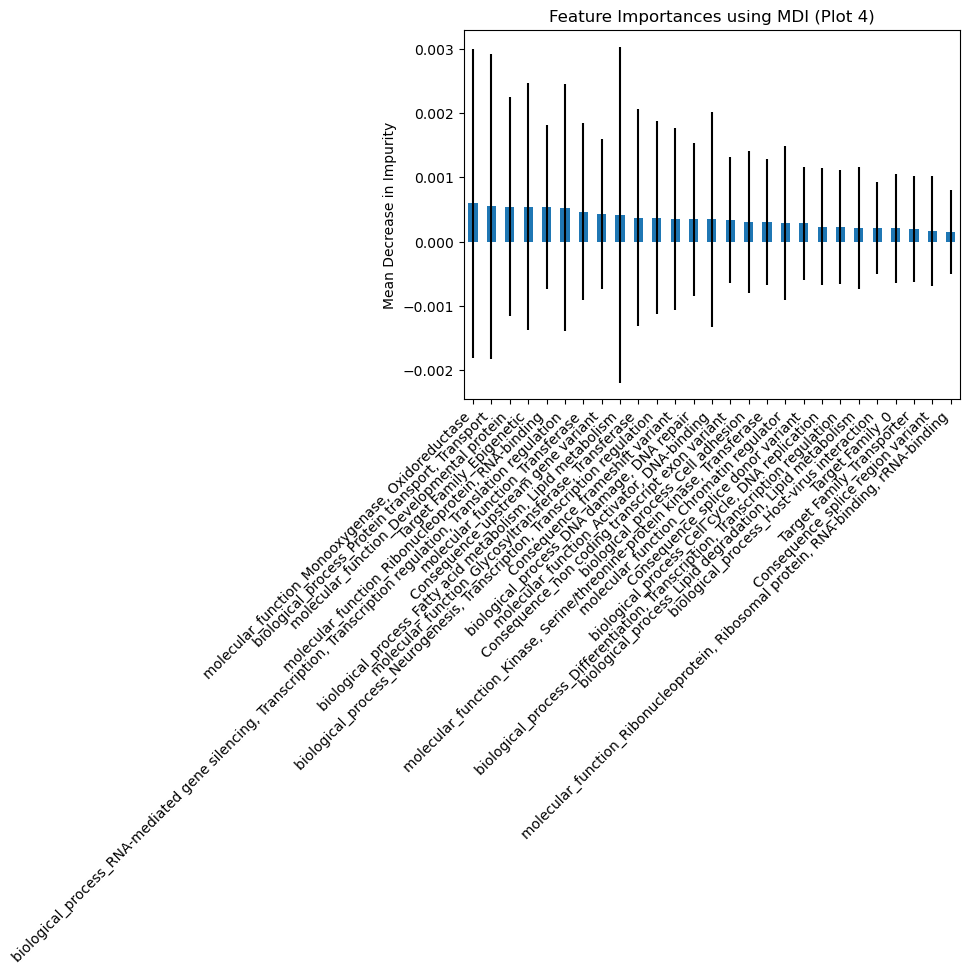

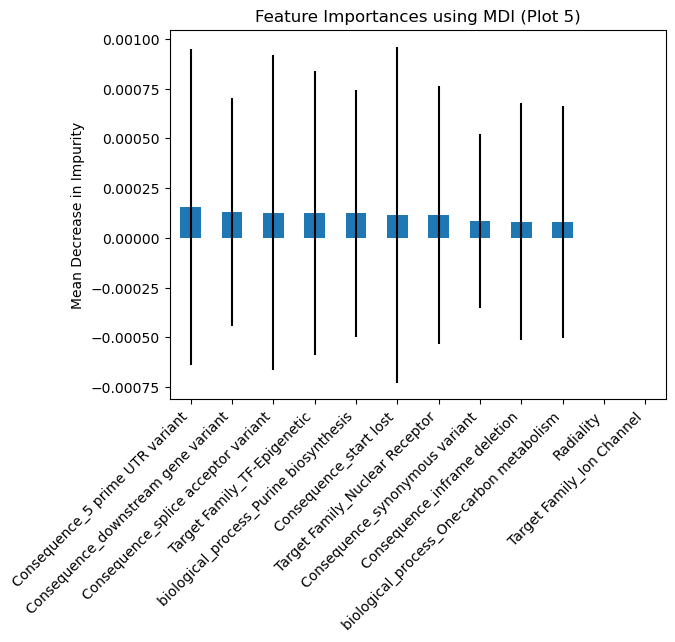

In [30]:
feature_names = X_encoded.columns.tolist()
forest_importances = pd.Series(importances, index=feature_names)
sorted_importances = forest_importances.sort_values(ascending=False)
importances_index = range(len(importances))  # Create an index for the original order
sorted_index = sorted(importances_index, key=lambda i: importances[i], reverse=True)  # Sort this index based on importances
sorted_std = [std[i] for i in sorted_index]
num_features_per_plot = 27
total_plots = len(sorted_importances) // num_features_per_plot + int(len(sorted_importances) % num_features_per_plot > 0)
for i in range(total_plots):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    subset_importances = sorted_importances[start_idx:end_idx]
    subset_std = sorted_std[start_idx:end_idx]

    fig, ax = plt.subplots()
    subset_importances.plot.bar(yerr=subset_std, ax=ax)
    ax.set_title(f"Feature Importances using MDI (Plot {i+1})")
    ax.set_ylabel("Mean Decrease in Impurity")
    ax.set_xticklabels(subset_importances.index, rotation=45, ha="right")
    plt.show()

In [31]:
fig = px.bar(df, x=feature_names, y=sorted_importances.values, error_y=sorted_std,
             labels={'Features': 'Feature', 'Importances': 'Mean Decrease in Impurity'},
             title='Feature Importances using MDI')
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Feature',
                  yaxis_title='Mean Decrease in Impurity', title_x=0.5)
fig.show()

## XGBoost Classifier

In [32]:
XGmodel = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42)
XGmodel.fit(X_train, yXG_train)
predictions = XGmodel.predict(X_test)
accuracy = accuracy_score(yXG_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.757201646090535


In [33]:
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(XGmodel, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.7244898  0.70408163 0.71134021 0.73195876 0.72164948 0.74226804
 0.71134021 0.73195876 0.71134021 0.73195876]


In [34]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.722238586156112}
{0.01173046709397781}


C:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning:

torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.



Class 0


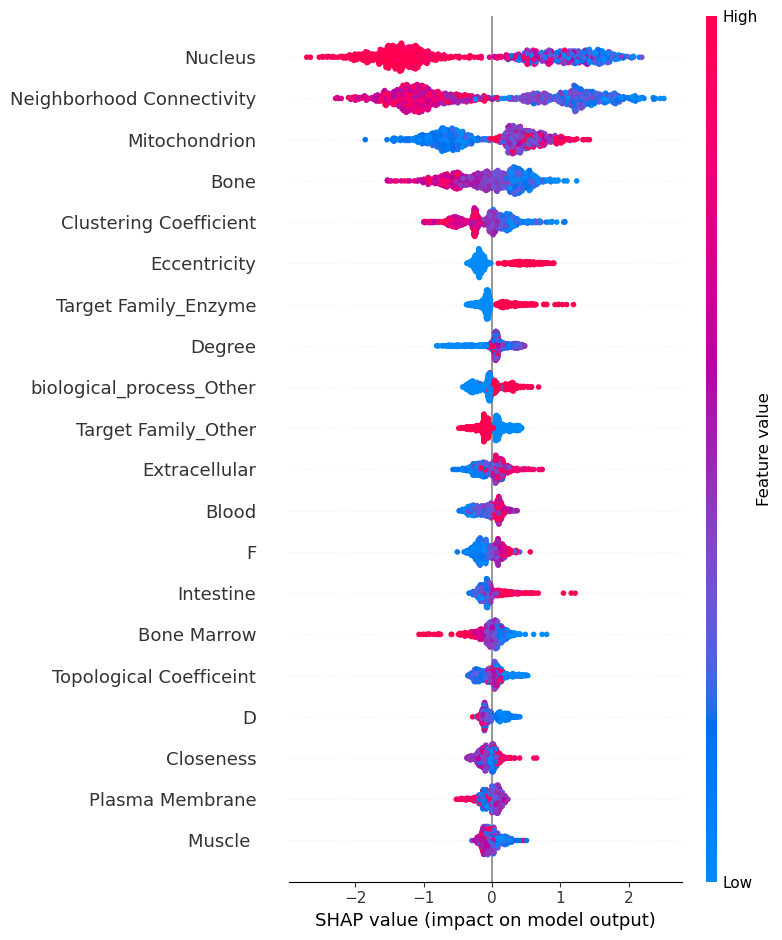

Class 1


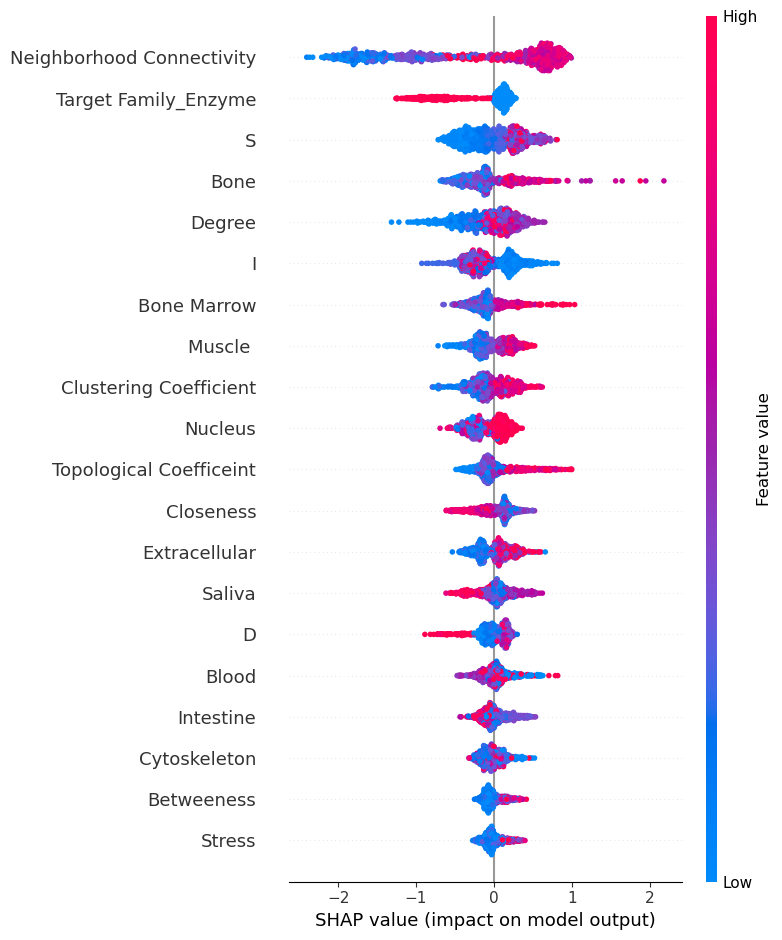

Class 2


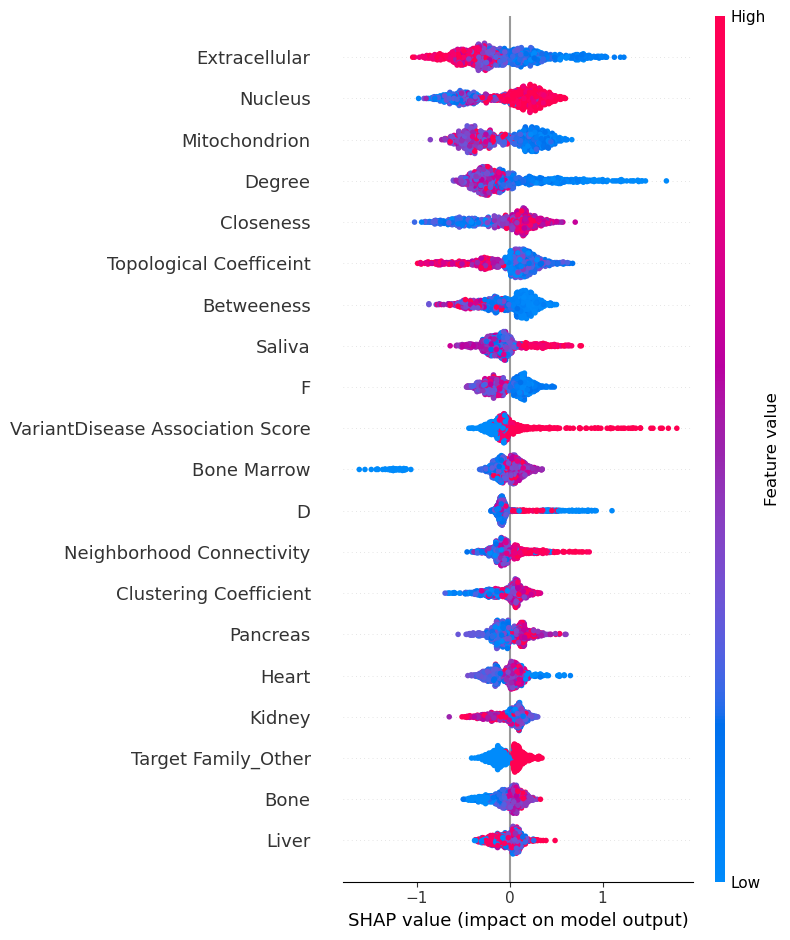

In [35]:
explainer = shap.TreeExplainer(XGmodel)
shap_values = explainer.shap_values(X_train)
for i in range(3):
    print(f"Class {i}")
    shap.summary_plot(shap_values[i], X_train, show=False)
    #plt.savefig('grafic.png')
    plt.show()

## ADA Boost Classifier

In [30]:
adamodel = AdaBoostClassifier(n_estimators=100, random_state=42)
adamodel.fit(X_train, yXG_train)
predictions = adamodel.predict(X_test)
accuracy = accuracy_score(yXG_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6790123456790124


In [31]:
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(adamodel, X_train, yXG_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.68367347 0.70408163 0.55670103 0.68041237 0.69072165 0.67010309
 0.63917526 0.73195876 0.59793814 0.64948454]


In [32]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.6604249947401641}
{0.04920267653265022}


## Stacked Ensemble Classifier

In [33]:
Xstack_train, Xstack_temp, ystack_train, ystack_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
Xstack_val, Xstack_test, ystack_val, ystack_test = train_test_split(Xstack_temp, ystack_temp, test_size=0.5, random_state=42)
yS_train = label_encoder.fit_transform(ystack_train)
yS_test = label_encoder.transform(ystack_test)
yS_val = label_encoder.transform(ystack_val)
for col in Xstack_train.columns:
    Xstack_train[col] = pd.to_numeric(Xstack_train[col], errors='coerce')
for col in Xstack_test.columns:
    Xstack_test[col] = pd.to_numeric(Xstack_test[col], errors='coerce')
for col in Xstack_val.columns:
    Xstack_val[col] = pd.to_numeric(Xstack_val[col], errors='coerce')
rf_pred = model_proteins.predict(Xstack_val)
xgb_pred = XGmodel.predict(Xstack_val)
ada_pred = adamodel.predict(Xstack_val)
stacked_predictions = np.column_stack((rf_pred, xgb_pred, ada_pred))
meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(stacked_predictions, yS_val)
final_pred = meta_model.predict(np.column_stack((model_proteins.predict(Xstack_test), XGmodel.predict(Xstack_test), adamodel.predict(Xstack_test))))

In [34]:
accuracy = accuracy_score(yS_test, final_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8765432098765432


In [35]:
from sklearn.model_selection import cross_val_score, KFold
scaler = StandardScaler()
Xstack_train_scaled = scaler.fit_transform(Xstack_train)
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(meta_model, Xstack_train_scaled, yS_train, cv=kfold_cv, scoring='accuracy')
print(cv_scores)

[0.61643836 0.61643836 0.69863014 0.71232877 0.63013699 0.67123288
 0.7260274  0.57534247 0.73972603 0.76388889]


In [36]:
print({np.mean(cv_scores)})
print({np.std(cv_scores)})

{0.6750190258751904}
{0.059551442196088905}


## GCN

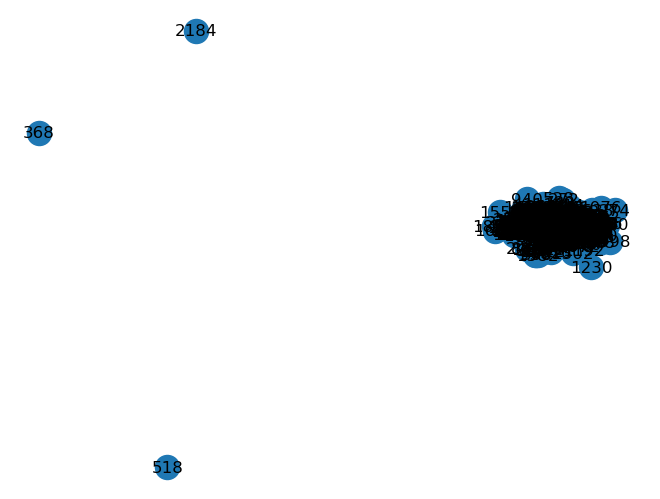

tensor([[   0,    0,    0,  ..., 1203, 1206, 1210],
        [ 319,   20, 1015,  ..., 1211, 1209, 1213]])
Shape of the tensor: torch.Size([2, 42177])


In [37]:
G = nx.read_graphml("C:/Users/colte/OneDrive/Documents/STRINGnetwork2.graphml")
G = G.to_undirected()
nx.draw(G, with_labels=True)
plt.show()
node_mapping = {node: i for i, node in enumerate(G.nodes())}
edge_list = list(G.edges())
edge_array = [[node_mapping[edge[0]], node_mapping[edge[1]]] for edge in edge_list]
edges_tensor = torch.tensor(edge_array, dtype=torch.long).t().contiguous()
print(edges_tensor)
print("Shape of the tensor:", edges_tensor.shape)

In [38]:
X_encoded = X_encoded.astype(float)
features_tensor = torch.tensor(X_encoded.values, dtype=torch.float32)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y)
labels_tensor = torch.tensor(labels_encoded, dtype=torch.long)
data = Data(x=features_tensor, edge_index=edges_tensor, y=labels_tensor)
print(data)

Data(x=[1215, 120], edge_index=[2, 42177], y=[1215])


In [39]:
num_nodes = data.num_nodes
node_indices = torch.randperm(num_nodes)
train_size = int(0.7 * num_nodes)
val_size = int(0.15 * num_nodes)
test_size = num_nodes - train_size - val_size
train_indices = node_indices[:train_size]
val_indices = node_indices[train_size:train_size+val_size]
test_indices = node_indices[train_size+val_size:]
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_indices] = True
val_mask[val_indices] = True
test_mask[test_indices] = True
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask
num_features = data.num_node_features
num_classes = len(np.unique(data.y.numpy()))

In [40]:
def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()
num_classes = torch.unique(data.y).size(0)
data.num_classes = num_classes
print(data.num_classes)
class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)
    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                    lr=0.01,
                                    weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask],
            data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].
            argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask],data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss:{loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss:{val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        predictions = out.argmax(dim=1)
        acc = accuracy(out.argmax(dim=1)[data.test_mask],
        data.y[data.test_mask])
        return acc, predictions
gcn = GCN(data.num_features, 64, data.num_classes)
print(gcn)
gcn.fit(data, epochs=100)
acc, pred = gcn.test(data)
print(f'GCN test accuracy: {acc*100:.2f}%')
print(f'GCN predictions: {pred}')

3
GCN(
  (gcn1): GCNConv(120, 64)
  (gcn2): GCNConv(64, 3)
)
Epoch   0 | Train Loss:1.260 | Train Acc: 29.65% | Val Loss:1.15 | Val Acc: 39.01%
Epoch  20 | Train Loss:1.089 | Train Acc: 37.88% | Val Loss:1.09 | Val Acc: 34.62%
Epoch  40 | Train Loss:1.077 | Train Acc: 41.65% | Val Loss:1.10 | Val Acc: 37.36%
Epoch  60 | Train Loss:1.064 | Train Acc: 42.71% | Val Loss:1.08 | Val Acc: 40.11%
Epoch  80 | Train Loss:1.051 | Train Acc: 41.65% | Val Loss:1.09 | Val Acc: 36.81%
Epoch 100 | Train Loss:1.040 | Train Acc: 43.65% | Val Loss:1.08 | Val Acc: 35.16%
GCN test accuracy: 37.16%
GCN predictions: tensor([1, 2, 0,  ..., 2, 2, 2])


## GAT

In [41]:
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)
class GAT(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)
    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return F.log_softmax(h, dim=1)
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
lr=0.01, weight_decay=0.01)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask],
data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask],
data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].
argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss:{loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss:{val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask],
    data.y[data.test_mask])
        return acc
gat = GAT(dataset.num_features, 60, dataset.num_classes)
gat.fit(data, epochs=100)
acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

Processing...
Done!


Epoch   0 | Train Loss:1.980 | Train Acc: 15.00% | Val Loss:1.97 | Val Acc: 13.00%
Epoch  20 | Train Loss:0.233 | Train Acc: 99.29% | Val Loss:0.90 | Val Acc: 71.20%
Epoch  40 | Train Loss:0.176 | Train Acc: 98.57% | Val Loss:0.92 | Val Acc: 71.80%
Epoch  60 | Train Loss:0.209 | Train Acc: 97.14% | Val Loss:0.90 | Val Acc: 74.20%
Epoch  80 | Train Loss:0.162 | Train Acc: 98.57% | Val Loss:0.99 | Val Acc: 70.00%
Epoch 100 | Train Loss:0.154 | Train Acc: 99.29% | Val Loss:0.87 | Val Acc: 76.00%
GAT test accuracy: 80.70%
